Os dados abaixo foram recolhidos colocando um corpo de prova de 10kg diretamente acima do centro geométrico da bancada que gerou os dados.
Desse modo, é esperado que cada um dos sensores de carga tenha o mesmo peso incidente em si.

In [1]:
import numpy as np
import pandas as pd

In [13]:
raw_data = pd.read_csv('data/com_garrafao_no_centro',  sep=", | -> ", names = ["timestamp", "intern_clock", 7, 6, 8, 5, 3, 1, 2, 4], engine = "python")
cols = ["timestamp", "intern_clock", 1, 2, 3, 4, 5, 6, 7, 8]
raw_data = raw_data[cols]
raw_data.drop('timestamp', inplace=True, axis=1)
# raw_data.drop('intern_clock', inplace=True, axis=1)
raw_data = raw_data.astype({1:"int", 2:"int", 3:"int", 4:"int", 5:"int", 6:"int", 7:"int", 8:"int"})
raw_data.drop(1, inplace=True, axis=1)
raw_data.drop(2, inplace=True, axis=1)
raw_data.drop(3, inplace=True, axis=1)
raw_data.drop(4, inplace=True, axis=1)
raw_data

,intern_clock,5,6,7,8
0,1420357,625080,2241356,-3838457,-32647
1,1421362,625402,2241219,-3838563,-32551
2,1422365,625585,2241310,-3838803,-32209
3,1423370,625978,2241331,-3838797,-32217
4,1424373,626355,2241541,-3838423,-32305
...,...,...,...,...,...
368,1789829,683691,2243088,-3843122,-28880
369,1790832,683567,2243382,-3842770,-28914
370,1791837,683702,2243418,-3842754,-28871
371,1792840,684013,2243223,-3842683,-29353


In [14]:
tara = pd.read_csv("data/tara.csv")
tara

,0
0,8.098834e+05
1,2.337495e+06
2,-3.719232e+06
3,9.581695e+04


In [15]:
tara_lista = list(tara.to_numpy().reshape(4,))
tara_lista.insert(0, 1)

In [16]:
data = raw_data.apply(lambda x: - x + tara_lista, axis=1)
# data["intern_clock"] = - data["intern_clock"]
data["timestamp"] = - data["timestamp"]

data

KeyError: 'timestamp'

Os dados das células de carga diminuem quando existe mais carga; os dados foram transformados para que ficassem de modo a aumentar com mais carga.
Além disso, aplicadas as taras, agora temos um referencial. 

Nota-se que o sensor 5 tá maluco.

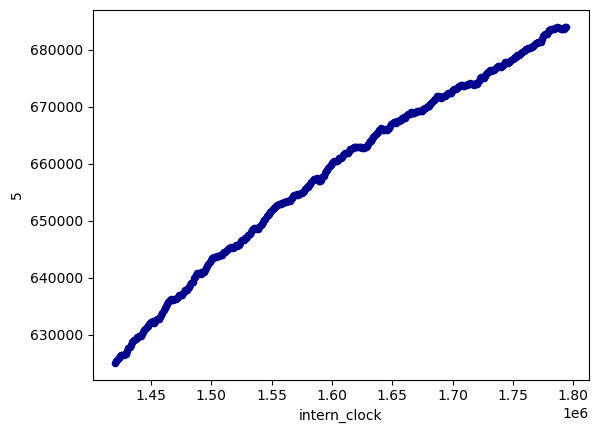

In [19]:
ax1 = raw_data.plot.scatter(x='intern_clock',
                      y=5,
                      c='DarkBlue')

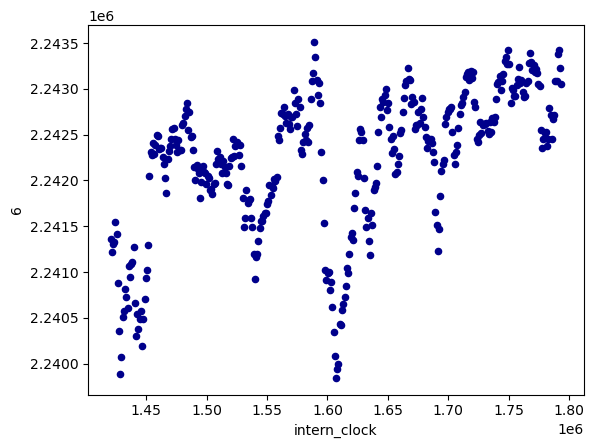

In [20]:
ax1 = raw_data.plot.scatter(x='intern_clock',
                      y=6,
                      c='DarkBlue')

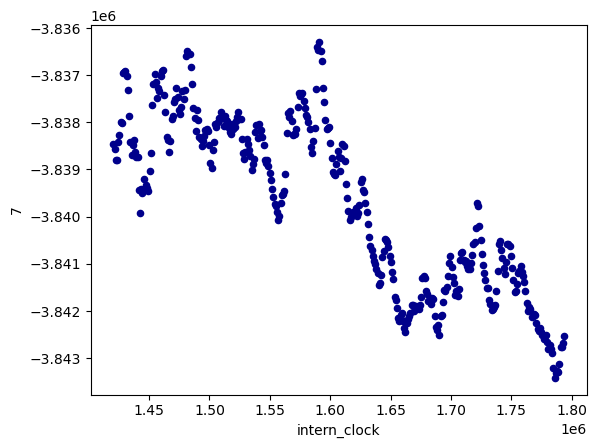

In [21]:
ax1 = raw_data.plot.scatter(x='intern_clock',
                      y=7,
                      c='DarkBlue')

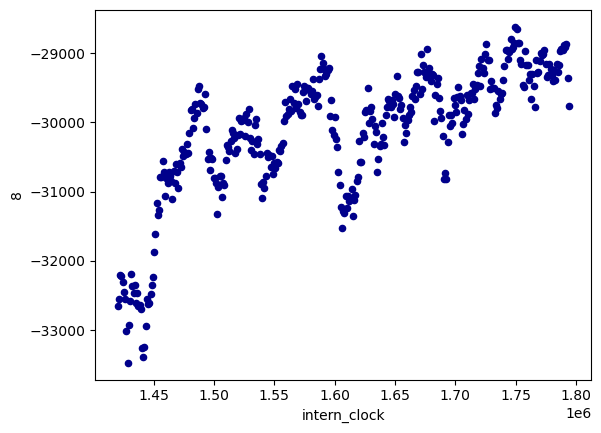

In [22]:
ax1 = raw_data.plot.scatter(x='intern_clock',
                      y=8,
                      c='DarkBlue')

a partir desses dados, infere-se duas coisas: é necessário saber porque o sensor 5 nao tá medindo direito, e é necessário corrigir o coeficiente angular dos sensores de carga pra que fiquem todos o mesmo.